# Hypothesis Testing Exercises

### Overview Exercises

#### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 

#### Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
    - Null Hypothesis: The network latency was not increased by the change in ISP.
    - Alternative Hypothesis: Network latency is higher now than before the ISP changed.
    - True Positive: Conclude latency has increased and latency actually has increased due to the ISP change.
    - True Negative: Conclude latency has not increased and latency has actually not increased due to the ISP change.
    - Type I Error: Conclude latency has increased and latency actually has not increased due to the ISP change.
    - Type II Error: Conclude latency has not increased and latency actually has increased due to the ISP change.
    
    
- Is the website redesign any good?
    - Null Hypothesis: The website redesign did not lead to an increase in click-throughs.
    - Alternative Hypothesis: The website redesign led to an increase in click-throughs.
    - True Positive: Conclude there was an increase in click-throughs when there was an increase due to the website redesign.
    - True Negative: Conclude there was no increase in click-throughs when there was no increase due to the website redesign.
    - Type I Error: Conclude there was an increase in click-throughs when there was no increase due to the website redesign.
    - Type II Error: Conclude there was no increase in click-throughs when there was an increase due to the website redesign.
    
    
- Is our television ad driving more sales?
    - Null Hypothesis: The release of the television ad had no effect on the rate of sales.
    - Alternative Hypothesis: The rate of sales increased following the release of the television ad.
    - True Positive: Conclude sales rate increased when it actually increased due to the TV ad.
    - True Negative: Conclude sales rate did not increase when it actually did not increase due to the TV ad.
    - Type I Error: Conclude sales rate increased when it actually did not increase due to the TV ad.
    - Type II Error: Conclude sales rate did not increase when it actually did increase due to the TV ad.

### T-Test Exercises

1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [13]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [32]:
# variance of office #1, variance of office #2
15**2, 20**2
# not equal variances

(225, 400)

$H_{0}$: Mean of sale time for office #1 == mean of sale time for office #2

$H_{a}$: Mean of sale time for office #1 != mean of sale time for office #2

In [33]:
# looking for difference in any direction; 2-tailed test
# comparing 2 subsets; 2-sample test
# reject null hypothesis if p<alpha

# set alpha
alpha = 0.05
# generate t and p values using t-test
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p, alpha

# p < alpha
# reject the null hypothesis
# there is a difference in home sale time between offices 1 and 2

(-2.7091418459143854, 0.00811206270346016, 0.05)

2. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_{0}$: Mean of mpg_2008 == mpg_1999
    
$H_{a}$: Mean of mpg_2008 != mpg_1999

In [34]:
# difference in any direction; 2-tailed test
# comparing 2 subgroups; 2-sample test

# load data
mpg = data('mpg')
# add column for average mpg from city & highway mpg
mpg['avg_mpg'] = (mpg.cty+mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<AxesSubplot:>

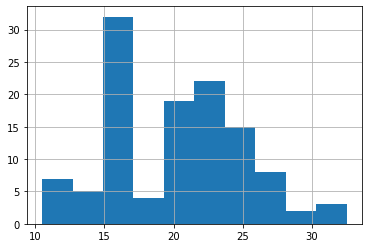

In [35]:
# isolate avg mpg values from 2008
mpg_2008 = mpg[mpg['year'] == 2008].avg_mpg
# view distribution
mpg_2008.hist()

<AxesSubplot:>

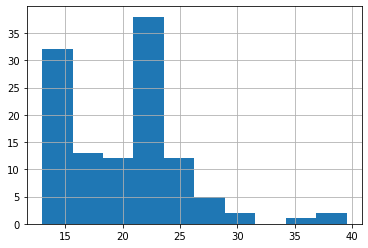

In [36]:
# take mean of avg mpg values from 1999
mpg_1999 = mpg[mpg['year'] == 1999].avg_mpg
# view distribution
mpg_1999.hist()

In [37]:
# compare variances
mpg_2008.var(), mpg_1999.var()
# not equal

(24.097480106100797, 27.122605363984682)

In [38]:
# use 2-sample t-test to generate t and p values
t, p = stats.ttest_ind(mpg_2008,mpg_1999, equal_var=False)
t, p, alpha
# p > alpha
# fail to reject null hypothesis
# There is not a significant difference in fuel efficiency between cars from 2008 and cars from 1999

(-0.21960177245940962, 0.8263750772060638, 0.05)

- Are compact cars more fuel-efficient than the average car?

$H_{0}$: Mean of compact_mpg <= Mean of overall_mpg

$H_{a}$: Mean of compact_mpg > Mean of overall_mpg

In [40]:
# difference in a single direction (compact mpg > avg car mpg?); 1-tailed test (p/2)
# comparing subgroup to entire group; 1-sample test
# reject null hypothesis if p/2<alpha and t>0

# isolate mpg for compact cars
compact_mpg = mpg[mpg['class'] == 'compact'].avg_mpg
# calculate mean of all cars' mpg
overall_mpg = mpg.avg_mpg.mean()

<AxesSubplot:>

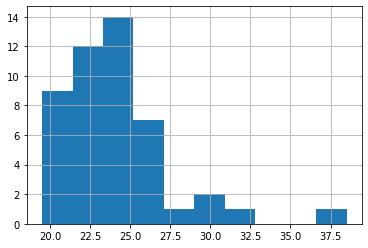

In [41]:
# visualize distribution of compact cars' mpg
compact_mpg.hist()

<AxesSubplot:>

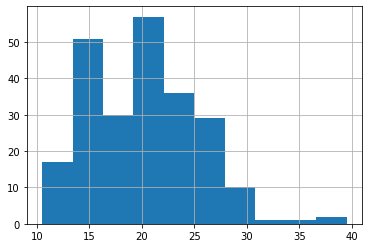

In [42]:
# visualize distribution of all cars' mpg
mpg.avg_mpg.hist()

In [44]:
# use 1-sample t-test to generate t and p values
t, p = stats.ttest_1samp(compact_mpg,overall_mpg)
t, p/2, alpha

# p/2 < alpha & t > 0
# reject null hypothesis
# On average, compact cars are more fuel efficient than the average car

(7.896888573132535, 2.0992818971585668e-10, 0.05)

- Do manual cars get better gas mileage than automatic cars?

$H_{0}$: Mean of manual_mpg <= Mean of automatic_mpg

$H_{a}$: Mean of manual_mpg > Mean of automatic_mpg

In [48]:
# difference in a single direction (manual mpg > automatic mpg?); 1-tailed test
# comparing 2 subgroups; 2-sample test
# reject null hypothesis if p/2 < alpha and t > 0

# isolate mpg of manual and automatic cars
manual_mpg = mpg[mpg['trans'].str.contains('manual')].avg_mpg
automatic_mpg = mpg[mpg['trans'].str.contains('auto')].avg_mpg
# compare variances
manual_mpg.var(), automatic_mpg.var()

(26.635167464114826, 21.942777233382337)

<AxesSubplot:>

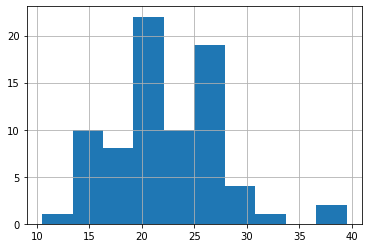

In [49]:
# visualize distribution of manual cars' mpg
manual_mpg.hist()

<AxesSubplot:>

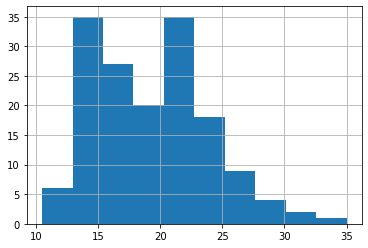

In [50]:
# visualize distribution of automatic cars' mpg
automatic_mpg.hist()

In [51]:
# use 2-sample t-test to generate t and p values
t, p = stats.ttest_ind(manual_mpg,automatic_mpg, equal_var=False)
t, p/2, alpha

# p/2 < alpha & t > 0
# reject null hypothesis
# On average, manual cars get better gas mileage than automatic cars.

(4.443514012903071, 8.976124499958965e-06, 0.05)